# 모델 평가
- 모델의 성능 평가는 모델링 중 현재 모델의 성능을 확인하는 검증 단계와 최종 성능 평가에서 진행한다.
- 어떤 문제를 해결하는 가와 모델의 어떤 측면의 성능을 확인하는 가에 따라 다양한 평가 방법이 있다. 
- 분류/회귀/군집에 따른 평가방법이 다르고, 같은 분류라 하더라도 어떤 지표를 중요하게 다루느냐에 따라 평가방법이 달라진다.
- `y-test같은 정답`과 `pred-test같은 모델의 예측값`을 두개의 변수로 주어, 평가지표를 확인한다. 
- 정답이 있는 자료구조(리스트)와 예측값이 있는 자료구조(리스트)를 비교하여 같은 인덱스에 있는 값들이 얼마나 서로 같은지 보는 구조

### 분류? 회귀? 군집?
구분 | 이름 | 설명 | 예시
|-|-|-|-|
1 | 분류 (Classification) | 정답이 카테고리(범주) 인 문제. | 이메일이 스팸이냐/아니냐, 개냐 고양이냐 판단, 암 진단 (악성/양성)
2 | 회귀 (Regression) | 정답이 숫자(연속값) 인 문제. | 집값 예측, 주식 가격 예측, 온도 예측
3 | 군집 (Clustering) | 정답(label)이 없이, 비슷한 것끼리 그룹 묶는 문제. | 고객 세그먼트 나누기, 뉴스 기사 자동 분류, 동물 사진을 특징별로 모으기

# 분류와 회귀의 평가방법

### 분류 평가 지표 (얼마나 잘 맞추는 가? 맞춘다는것이 디폴트인 느낌)
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법 (얼마나 덜 틀리는 가?)
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

번호 | 지표 | 설명 | 핵심 포인트
|-|-|-|-|
1 | MSE (Mean Squared Error) | 오차를 제곱해서 평균낸 값 | 값이 작을수록 좋다
2 | RMSE (Root Mean Squared Error) | MSE에 루트 씌운 값 | 해석이 더 쉬워진다
3 | $R^2$ (결정계수) | 모델이 데이터를 얼마나 잘 설명하는지 비율로 표현 | 1에 가까울수록 좋다

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

##  이진 분류(Binary classification)
- **특정 클래스인지 아닌지를 분류한다.**
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상이 True이인 것. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 False이인 것. 보통 0로 표현한다.
- 예
    - 환자인가? (검사기록을 통해 환자를 찾으려는 경우)
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? (메일의 내용을 바탕으로 스팸메일을 찾으려는 경우.)
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가? (금융거래 기록을 바탕으로 금융사기 거래를 찾으려는 경우.)
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0


### >>> 이진 분류 vs 다중 분류

> 강사님은 스팸vs정상 이런식으로 구분하는 것도 다중 분류라고 하심. 이진분류는 스팸이냐? 아니냐?를 묻는것이 이진 분류. 아래는 챗GPT의 내용.

항목 | 이진 분류 (Binary Classification) | 다중 분류 (Multi-class Classification)
|-|-|-|
클래스 수 | 2개 (ex. 긍정/부정, 스팸/정상)| 3개 이상 (ex. 개/고양이/토끼)
목표 | 특정 클래스에 속하는지 여부 판별 | 여러 클래스 중 어떤 클래스인지 판별
예시 | - 이메일: 스팸 vs 정상   - 암 진단: 있음 vs 없음 | - 동물 분류: 개, 고양이, 토끼  - 과일: 사과, 바나나, 포도
출력 값 | 보통 확률 1개 (ex. 클래스 1일 확률) | 보통 클래스별 확률 여러 개
주의점 | 클래스 불균형 이슈 발생 가능 | 일부 클래스만 학습될 위험 있음

### >>> 요약 한 줄

> - 이진분류는 "이거나 저거냐?"
> - 다중분류는 "여러 가지 중에 무엇이냐?"



## 정확도 (Accuracy)
- **분류문제의 대표 평가 지표**


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 한계
- 추론한 전체 데이터를 기준으로 평가한다. 그래서 클래스별 성능 평가가 안된다.
- 예를 들어 이진 분류에서 **양성(Positive) 또는 음성(Negative)에 대한 지표를 따로 확인 할 수없다.** 
    - 전체 중 몇 개가 맞았는지에 대한 평가 지표이므로 양성(Positive)만의 성능 또는 음성(Negative)만의 성능을 알 수 없다.
    - 특히 불균형 데이터의 경우 정확도 만으로 정확한 성능평가가 어렵다.
        - 만약 양성과 음성의 비율이 1:9 인 데이터를 모델이 모두 음성이라고 예측해도 정확도는 90%가 된다. 양성은 아예 맞추지 못하는 모델임에도 정확도(Accuracy)만 보면 괜찮은 성능으로 볼 수있다. 따라서 다른 분류평가지표를 활용하여 모델의 성능을 확인해야한다.

> ## MNIST Data set
> - 손글씨 숫자 데이터 셋
>     - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
> - 사이킷런 제공 image size: 8 X 8 >>> 총 64픽셀
>     - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
> - https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

X.shape, y.shape, X.dtype # X.shape의 64는 feature가 64개 있다는 것.

((1797, 64), (1797,), dtype('float64'))

In [2]:
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)))

In [3]:
digits.feature_names #64 feature의 의미? 64개의 픽셀!

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [4]:
# y의 클래스(고유값), 개수 조회
# y배열에 있는 고유값들, 고유값이 등장한 횟수를 반환
np.unique(y, return_counts=True) # 개수가 180안팎으로 균형데이터에 해당함.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [5]:
 # digitdata 중 0이 가지고 있는 정보 출력>> 1차원의 64개(픽셀) 정보 가지고 있음 >> 현재 shape은 (1x64)
X[0], X[0].shape

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 (64,))

In [6]:
# X(image)를 2차원(image 형태)로 reshape
X[0].reshape(8, 8) # 아래에서 그림으로 보면, 숫자 0을 의미하는걸 알 수 있다.
# 숫자에 따라 black, white의 농도가 달라진다.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

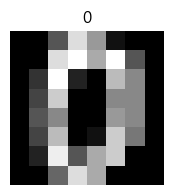

In [7]:
# image 확인
img_index = 0 # 확인할 image index. 0~9 숫자 바꿔 넣어보기.
plt.figure(figsize=(2, 2)) # 픽셀의 원래 크기가 아닌, plt의 2x2 figsize로 보여준다. 그래서 픽셀이 좀 깨져 보임
img = X[img_index].reshape(8, 8)
plt.imshow(img, cmap='gray')  # imshow(): image 출력 함수. cmap="gray": grayscale color map으로 최소값: black ~ 최대값: white 로 출력.
plt.title(y[img_index])
plt.axis('off') # 눈금축(spine)이 안나오도록 처리리
plt.show()

In [8]:
# 실체 크기 확인 (Python Image Libraray) 파이썬 자체의 라이브러리
from PIL import Image

pill_img = Image.fromarray(img)
pill_img.show()

### 불균형 데이터셋으로 만들기
- 위에선 0에서 9까지의 숫자중에 하나를 맞추는 다중 분류였는데, 이번엔 9냐 아니냐를 분류하는 데이터 셋을 변환.
- 숫자 이미지를 입력으로 받아 0 ~ 9 로 분류하는 문제를 위한 데이터셋을 9와 나머지 숫자로 분류하는 데이터셋으로 변환한다.
    - 이미지의 숫자가 9인지를 물어보는 이진분류(binary classfication) 문제로 변환.
    - 이진분류의 Label은 `0`과 `1` 로 0이 Negative, 1이 Positive 값으로 사용된다.
- Positive(찾으려는 대상 - 1): 9
- Negative(찾으려는 대상이 아닌 것 - 0): 0 ~ 8

### >>> 불균형 데이터셋이란? (Imbalanced Dataset)
데이터 안의 클래스(label) 비율이 심하게 치우쳐 있는 경우.

하나의 클래스는 데이터가 엄청 많고
다른 클래스는 데이터가 거의 없는 상황

모델이 다수 클래스만 잘 맞추고, 소수 클래스는 무시해도
정확도(accuracy)는 높게 나올 수 있어서 착각하기 쉬움



In [9]:
# np.where(y==9) >> 9가 있는 인덱스를 출력
y = np.where(y==9, 1, 0)  # 9가 있는 인덱스를 출력하여, True는 1로, False는 0으로 만들기

In [10]:
v = np.unique(y, return_counts=True)

print(v) # Ture와 False 개수 확인
print(v[1]/y.size) # 0부터 9까지의 비율을 보여줌 >> v[1] == array([1617,  180]), y.size == 1617+180

(array([0, 1]), array([1617,  180]))
[0.89983306 0.10016694]


In [11]:
# 모든 값을 0(False, 다수클래스)로 예측 하면?
y_hat = np.zeros_like(y) # y와 동일한 shape을 가지면서, 값은 전부 0으로 채운 배열을 만들기

In [12]:
# 정확도 평가
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat) # 정답 y와 예측값(all 0) y_hat를 비교. 위에서 확인한 0(False)의 비율과 같다.
# 결론: 0~9의 숫자중에서 9를 분류하려했지만, 불균형 데이터셋이기 때문에, 9는 하나도 없는 데이터임에도 불구하고, 정확도(Accuracy)가 89퍼센트가 나온다.
# 정확도가 만능이 아니라는 결론.

0.8998330550918197

## 혼동 행렬(Confusion Matrix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- **0번축:** 실제(정답) class, **1번축:** 예측 class, **cell:** 개수

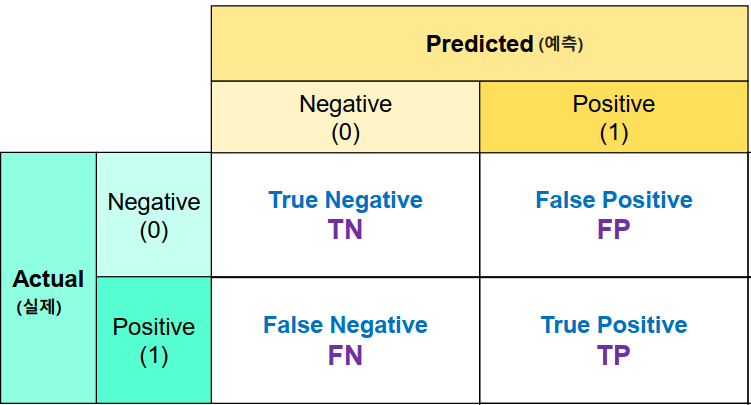

- True(정답을 맞음)/False(정답을 틀림) & pos(모델이 양성으로 예측)/neg(모델이 음성으로 예측)

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측
- 예)
```python
[[20, 6],
 [4,  40]]
 # accuracy만 봤으면 70개중 10개 틀렸다고 했을텐데, 혼동행렬(confusion matrix)을 통해 정확히 어떤 오답을 내서 틀렸는지 알 수 있다.
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    


### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율 >>> 정답이 양성인걸 얼마나 잘 맞았는가?
    - **TPR**(True Positive Rate) 이라고도 한다. >>> 정답이 0인건 관심없음
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율 >>> 모델이 양성이라고 예측한 것중에 얼마나 잘 맞혔는가??
    - **PPV**(Positive Predictive Value) 라고도 한다. >>> 0이라고 예측한 건 관심없음
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - 조화평균이란? 역수의 평균을 다시 뒤집은 것.
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
    - 조화 평균은 작은 값에 더 민감해서, **균형 잡힌 성능(예: Precision & Recall)**을 평가할 때 자주 쓰인다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율 >>> 음성에 대해서 맞은 것의 비율.
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도` >>> 음성에 대해서 틀린 것의 비율.
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

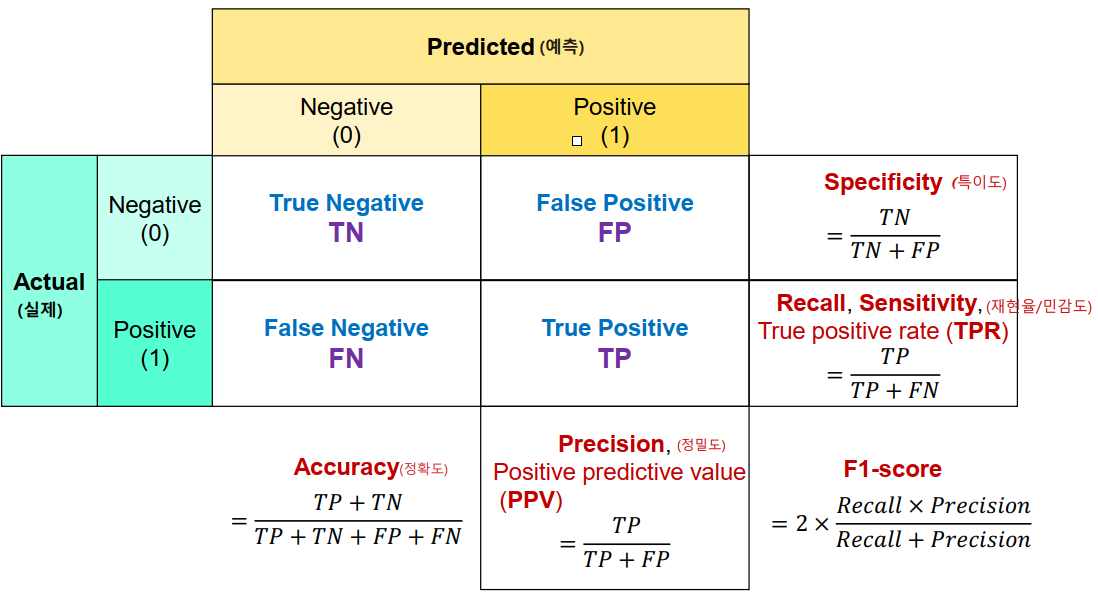

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- 평가지표들이 요구하는 파라미터 모두 같다. y실제값과 y예측값.
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (실제 Positive 중 예측 Positive의 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (예측 Positive 중 실제 Positive의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 문자열로 반환한다.
 
### 다중분류에서 recall/precsion/f1 score
- recall/precsion/f1 score 는 이진분류 평가지표 이다. >> 양성에 대한 recall, precision
- 다중분류 평가에 사용할 경우 average 파라미터에 설정한다.
    - average="binary" (default: binary는 이진분류만 평가한다.)
        - "micro": class상관 없이 전체 클래스를 기준으로 계산한다.
        - "macro": class별로 계산한 뒤 평균을 낸다. >>>하나를 pos, 나머지를 neg로하여 모든 class를 돌아가며 pos 만들어 avg 구한 뒤 평균내기
        - "weighted": class별로 계산한 뒤 class의 데이터 수에 따라 가중치 평균을 낸다.

In [13]:
from sklearn.metrics import ( #원랜 엔터쳐서 한번에 import 못하고 한줄로 이어가야하는데, 괄호를 쓰면 가능!
        confusion_matrix,
        ConfusionMatrixDisplay, # confusion matrix 시각화클래스
        accuracy_score,
        recall_score, 
        precision_score,
        f1_score,
        classification_report
)

### 머신 모델을 이용해 학습
- DecisionTreeClassifier
- RandomForestClassifier >>> decisiontree를 여러개 만들어서 모아 놓고, 각각의 decisiontree의 추론들을 취합하여, 분류일 경우 다수결로, 회귀일 경우 평균을 내어 알려준다. 앙상블 모델!

### DecisionTree vs RandomForest
항목 | Decision Tree | Random Forest
|-|-|-|
구조 | 트리 1개 | 트리 여러 개 (앙상블)
과적합 유무 (훈련데이터에 너무 맞춰질 위험) | 있음(작은 변화에 민감) | 낮음
학습 속도 | 빠름 | 느림 (트리 많이 생성)
예측 정확도 | 낮을 수 있음 | 높음
해석 가능성 | 높음 (조건문 추적 가능) | 낮음 (여러 트리로 복잡함)
예측 방식 | 단일 결정 경로 | 다수결 or 평균
사용 시기 | 단순/빠른 모델 원할 때, 모델 결과를 해석하고 설명해야 할 때 | 성능 중요하고 안정성 필요할 때, 정확한 예측이 더 중요할 때
요약 | Decision Tree는 "빠르고 직관적인 모델"|Random Forest는 "여러 트리를 섞어 더 정확하고 안정적인 모델"


In [14]:
from sklearn.model_selection import train_test_split # 데이터셋은 상기 MNIST data set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=0)
# stratify: y의 클래스 비율(라벨 분포)을 학습 데이터와 테스트 데이터에 똑같이 유지하겠다
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [15]:
##### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=3)

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [16]:
# Confusion Matrix
# train과 test에 대해 정답과 예측값 비교확인.
cm_train = confusion_matrix(y_train, pred_train_tree)
cm_test =  confusion_matrix(y_test, pred_test_tree)

print(f"train set\n{cm_train}")
print("-"* 20)
print(f"test set\n{cm_test}")

train set
[[1167   45]
 [  27  108]]
--------------------
test set
[[394  11]
 [ 11  34]]


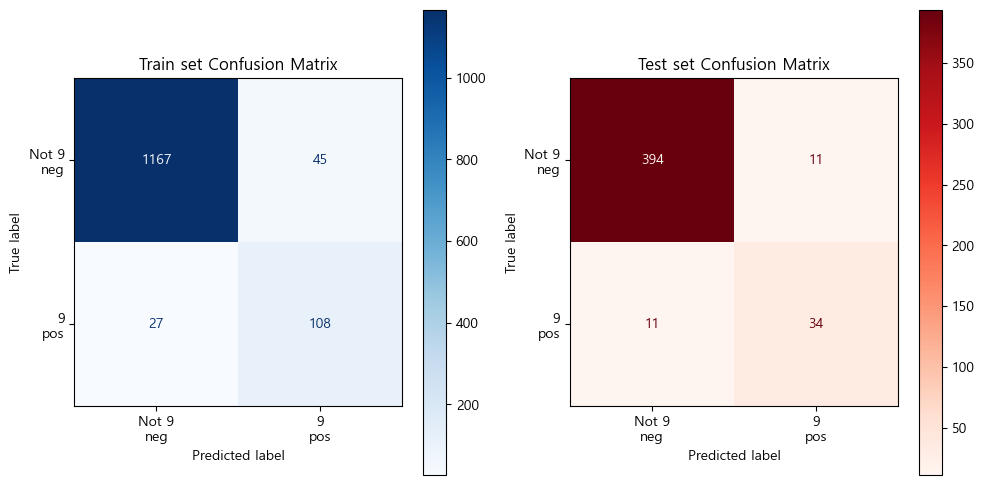

In [17]:
# 시각화 - matplotlib 를 이용해 plotting
import matplotlib.pyplot as plt

### 하나의 Figure 두개 subplot으로 그리기.
fig = plt.figure(figsize=(10, 5)) #fig는 10x5 크기
ax1 = fig.add_subplot(1, 2, 1) # 1x2 나눈 것중 첫번째 위치의 이름을 ax1
ax2 = fig.add_subplot(1, 2, 2) # 1x2 나눈 것중 두번째 위치의 이름을 ax2

# train set confusion matrix
disp_train = ConfusionMatrixDisplay( # 내부적으로 matplotlib을 이용해서 혼동행렬을 시각화하여 보여준다.
    cm_train, #confusion matrix
    display_labels=['Not 9\nneg', '9\npos']       # [음성레이블, 양성레이블]
)
disp_train.plot(cmap='Blues', ax=ax1)    # 출력. disp_train을 plot할건데, 파란색으로, ax1자리에 만들어라!

# test set confusion matrix
disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
    display_labels=['Not 9\nneg', '9\npos']) 
disp_test.plot(cmap='Reds', ax=ax2)     # 출력. disp_train을 plot할건데, 빨간색으로, ax2자리에 만들어라!

# naming
ax1.set_title("Train set Confusion Matrix") # ax1 타이틀 네이밍
ax2.set_title("Test set Confusion Matrix")  # ax2 타이틀 네이밍
plt.tight_layout()
plt.show()

## precision과 recall 차이나는 이유

### 개요
- precision : 모델이 "맞다고 한 것" 중 실제로 맞은 비율
- recall : 전체 정답 중 모델이 맞춘 비율

### 예상되는 상황

상황 | 설명
|-|-
Precision이 낮고 Recall이 높다 | 모델이 많이 맞추긴 하는데, 그 중 틀린 것도 많음 → "막 찍는 스타일" >>> 공격적인 모델
Precision이 높고 Recall이 낮다 | 모델이 맞는 것만 조심히 찍음, 대신 많은 정답을 놓침 → "신중한 스타일" >>> 보수적인 모델

### 양성의 개수와의 관계
"양성의 개수만 보고" 누가 더 높을지 알 수 있나?
정답: Nope. 양성 개수만 보고는 알 수 없다.

→ 왜냐하면 precision과 recall은 "모델이 양성을 얼마나 예측하느냐"에 따라 결정되기 때문.

양성이 적다고 해서 무조건 precision이 높거나 recall이 낮은 건 아님.
결국 모델이 얼마나 TP, FP, FN을 만들어내는지가 핵심

### 요약
- Precision은 예측이 얼마나 신중했는가
- Recall은 놓치지 않고 얼마나 다 맞췄는가

In [18]:
# 정확도.
print("DecisionTree 정확도(Accuracy)")
print(f"Trainset : {accuracy_score(y_train, pred_train_tree)}, Testset: {accuracy_score(y_test, pred_test_tree)}")

DecisionTree 정확도(Accuracy)
Trainset : 0.9465478841870824, Testset: 0.9511111111111111


In [19]:
# 9가 양성 나머지 음성
# recall과 함께 보면, 0보단 1을 잘 못맞춘다는 걸 알 수 있다.
# 9에 대한 정보가 나머지들에 비해 매우 적기 때문에 9에 대한 precision과 recall이 accuracy에 비해 낮다.
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")

DecsionTree 정밀도(Precision) - 1기준
Trainset : 0.7058823529411765, Testset: 0.7555555555555555


In [20]:
print("DecisionTree 재현율(Recall)")
print(f"Trainset : {recall_score(y_train, pred_train_tree)}, Testset: {recall_score(y_test, pred_test_tree)}")

DecisionTree 재현율(Recall)
Trainset : 0.8, Testset: 0.7555555555555555


In [21]:
print("DecisionTree F1 score")
print(f"Trainset : {f1_score(y_train, pred_train_tree)}, Testset: {f1_score(y_test, pred_test_tree)}")

DecisionTree F1 score
Trainset : 0.75, Testset: 0.7555555555555555


In [22]:
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree)) # 꼭 프린트해서 봐야한다. 그냥 return해서 보면 str 줄글로 나온다.
# support 항목은 총 개수를 말하는 것.
# macro avg는 각 precision등의 0,1에 대한 값의 평균 (ex (0.98+0.71)/2)
# weighed avg는 support값을 적용하여 가중 평균을 구한 것.

---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1212
           1       0.71      0.80      0.75       135

    accuracy                           0.95      1347
   macro avg       0.84      0.88      0.86      1347
weighted avg       0.95      0.95      0.95      1347



In [23]:
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       405
           1       0.76      0.76      0.76        45

    accuracy                           0.95       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.95      0.95      0.95       450



In [24]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 - randomforest이므로, 각 Tree가 독립적으로 학습하고 다수결로 결론을 도출한다.
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0) # tree개수 200개

# 학습
rfc.fit(X_train, y_train)

## 추론
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc =  rfc.predict(X_test)

In [25]:
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[1212,    0],
       [  87,   48]])

# TODO

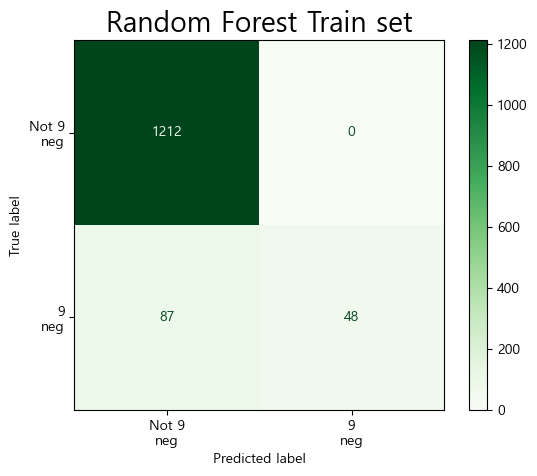

In [26]:
## Confusion Matrix Display
# 시각화 - matplotlib 를 이용해 plotting
### Trainset Confusion Matrix만 시각화.
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["Not 9\nneg", "9\nneg"])
cm_display2.plot(cmap="Greens")
plt.title("Random Forest Train set", fontsize=20)
plt.show()

In [27]:
## 정확도
print("RandomForest 정확도(Accuracy)")
print(f"Trainset : {accuracy_score(y_train, pred_train_rfc)}, Testset: {accuracy_score(y_test, pred_test_rfc)}")

RandomForest 정확도(Accuracy)
Trainset : 0.9354120267260579, Testset: 0.9333333333333333


In [28]:
## Recall(재현율)
print("DecisionTree 재현율(Recall)")
print(f"Trainset : {recall_score(y_train, pred_train_rfc)}, Testset: {recall_score(y_test, pred_test_rfc)}")
# 모든 1을 다 맞추는건 아님.

DecisionTree 재현율(Recall)
Trainset : 0.35555555555555557, Testset: 0.3333333333333333


In [29]:
## Precision(정밀도)
print("RandomForest 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_rfc)}, Testset: {precision_score(y_test, pred_test_rfc)}")
# 일단 1이라고 말만하면 그건 다 맞음.

RandomForest 정밀도(Precision) - 1기준
Trainset : 1.0, Testset: 1.0


In [30]:
## F1 Score
print("DecisionTree F1 score")
print(f"Trainset : {f1_score(y_train, pred_train_rfc)}, Testset: {f1_score(y_test, pred_test_rfc)}")

DecisionTree F1 score
Trainset : 0.5245901639344263, Testset: 0.5


In [31]:
## Classification Report 출력
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train_rfc))
print()
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test_rfc))


---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1212
           1       1.00      0.36      0.52       135

    accuracy                           0.94      1347
   macro avg       0.97      0.68      0.74      1347
weighted avg       0.94      0.94      0.92      1347


---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       405
           1       1.00      0.33      0.50        45

    accuracy                           0.93       450
   macro avg       0.97      0.67      0.73       450
weighted avg       0.94      0.93      0.92       450



In [32]:
%%writefile metrics.py
# 모듈이름 metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score

__version__ = 1.0 # 모듈 만들땐 version 써주자

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises:
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title: # title 받아온게 있어서, title이 None이 아니라면, 그 title을 적으란 소리
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    Args
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 결과에 대한 제목 default=None
    Returns
    Raises
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))

Overwriting metrics.py


In [33]:
import metrics
from metrics import plot_confusion_matrix, print_binary_classification_metrics

In [34]:
metrics.__version__
# 모듈 버전 확인

1.2

In [35]:
###RandomForest 모델 추론 결과
print_binary_classification_metrics(y_train, pred_train_rfc, "RandomForest Trainset")

정확도: 0.9354120267260579
재현율: 0.35555555555555557
정밀도: 1.0
F1 점수: 0.5245901639344263


InvalidParameterError: The 'y_score' parameter of average_precision_score must be an array-like. Got 'RandomForest Trainset' instead.

In [37]:
print_binary_classification_metrics(y_test, pred_test_rfc, "RandomForest Testset")

RandomForest Testset
정확도: 0.9333333333333333
재현율: 0.3333333333333333
정밀도: 1.0
F1 점수: 0.5


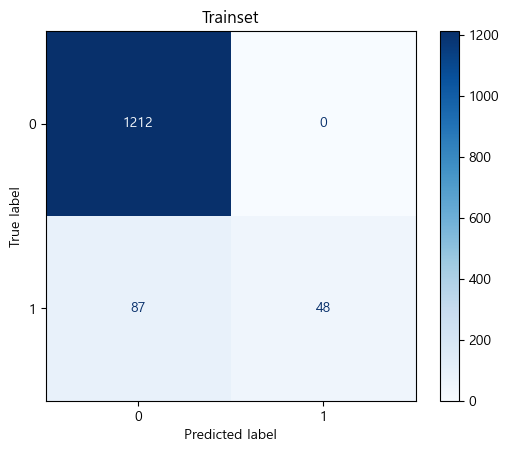

In [38]:
plot_confusion_matrix(y_train, pred_train_rfc, "Trainset")

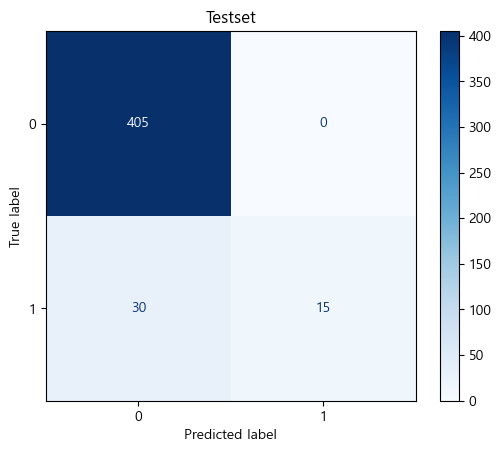

In [39]:
plot_confusion_matrix(y_test, pred_test_rfc, "Testset")

### RF와 DT가 차이나는 이유

#### 1. RandomForest는 "신중하게" 예측하는 경향이 있다

RandomForest는 수많은 트리들이 투표해서 결과를 결정한다다.
"1" (positive)을 예측하려면 여러 트리들이 동시에 '1'이라고 동의해야 한다다.

그래서 확실히 1인 경우만 "1"이라고 예측하고 조금이라도 애매하면 "0"으로 예측해버린다.

결과적으로 1이라고 예측하는 경우가 엄청 드물어짐.
하지만 한 번 1이라고 예측하면 진짜 1이 맞는 경우가 많음. 그래서 precision은 1.0이 나온다.
대신 recall은 엄청 낮아짐 → 1을 거의 못 찾아낸다.

#### 2. DecisionTree는 "적극적으로" 예측하는 경향이 있다

단일 Decision Tree는 학습 데이터에 아주 맞춰서(split) 가려고 한다.

그래서 "1"을 찾으려는 시도도 많이 한다다.

결과적으로 Precision, Recall 모두 좀더 균형 있게 나오거나
경우에 따라서는 overfitting 될 수도 있다.

## 재현율과 정밀도의 관계

**분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**
- 전제, 일단 둘 다 좋은게 좋은 것. but 둘 중에 하나가 낮아서는 안되는 업무가 있다.

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델
- 암환자(1)인데도, 정상(0)이라고 판단한 경우가 critical하다. 암환자인데도 판정을 제대로 못함
- 정상(0)인데 암환자(1)라고 하는건 그 반대보다 작은 문제.

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정
- 정상(0)인데도, 스팸(1)이라고 판단한 경우가 criticla하다. 정상적으로 봐야할 걸 못보게 됨.
- 스팸메일(1)을 정상(0)이라고 하는 건 사실 큰 문제 없음.

## 결과 후처리를 이용해 재현율 또는 정밀도 성능 올리기

- Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도를 올릴 수 있다.
- **결과 후처리시 임계값(Threshold) 변경**
    - 분류 모델은 입력값에 대해 class별 확률을 예측 한다. 그 출력된 확률값이 높은 class를 정답 class로 처리한다.
    - 즉, 0일 확률, 1일 확률을 뽑아내서 더 확률이 높은 쪽을 예측값으로 뽑아내는데, 그 기준이 0.5다.
    - 1일 확률 0.9라서 1이라고 출력하는 것과, 1일 확률 0.51이라서 1이라고 출력하는 것은 다르다.
    - accuracy 관점에선 둘 다 같지만, 다른 자료입장에선 아니다.
    - 따라서 threshold를 조절하여 1이라고 뽑아낼 1일확률의 기준을 새롭게 정한다.
    - **이진 분류**의 경우 모델은 양성(Positive)일 확률을 출력한다. 
    - **결과 후처리**
        - 이진 분류 모델이 출력한 양성일 확률에서 양성과 음성을 나누는 임계값(Threshold)을 정하고 그 임계값 이하일 경우 음성, 초과일 경우 양성으로 class를 정한다. 이 작업은 결과 후처리에서 진행한다.
        - 그 임계값을 무엇으로 하느냐에 따라 재현율과 정밀도가 변경된다. (기본: 0.5)
    - 모델의 재현율이나 정밀도 성능을 높이기 위해 **후처리 작업에서 사용하는 임계값(threshold)를 변경한다.**
        - 단 임계값(threshold)를 변경해서 하나의 성능을 올라가면 다른 하나는 떨어진다. 즉 `**재현율(recall)과 정밀도(precision)의 임계값 변경에 따른 성능변화는 반비례한다.**`
        - 그래서 극단적으로 임계점을 변경해서 한쪽의 점수를 높이면 안된다.
            - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.

![image.png](images/thresh.png)

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율(recall)은 올라가고 정밀도(precision)는 낮아진다.**
    - **임계값을 높이면 재현율(recall)은 낮아지고 정밀도(precision)는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class(0or1)를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환(분류형일때 이 메서드가 하나 더 있는 것. 회귀에는 없다!)

In [40]:
# class 별 확률 조회
pred_tree_proba = tree.predict_proba(X_test) # 각 클래스별 확률 [0일 확률, 1일 확률]
print(pred_tree_proba[10:30]) #  10~29번!
print(tree.predict(X_test)[10:30])  # 정답 클래스
print()

# #1(양성) 일 확률만 조회
pred_tree_pos_proba = pred_tree_proba[:, 1]    # 클래스가 1(양성)일 확률만 조회
print(pred_tree_pos_proba[10:30]) 
print()

# # 임계값 변경 (양성/음성을 나누는 기준이 되는 확률값.) ==> 0.1
thresh = 0.1 # 1일 확률이 0.1 이상이면 1로 예측
pred_test_tree2 = np.where(pred_tree_pos_proba >= thresh, 1, 0)

print(pred_test_tree2[10:30])

[[0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.25       0.75      ]
 [0.96610169 0.03389831]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.85074627 0.14925373]
 [0.45454545 0.54545455]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]
 [0.85074627 0.14925373]
 [0.98695652 0.01304348]
 [0.99173554 0.00826446]
 [0.98695652 0.01304348]
 [0.96610169 0.03389831]
 [0.98695652 0.01304348]
 [0.98695652 0.01304348]]
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]

[0.01304348 0.01304348 0.01304348 0.75       0.03389831 0.01304348
 0.01304348 0.01304348 0.01304348 0.14925373 0.54545455 0.01304348
 0.01304348 0.14925373 0.01304348 0.00826446 0.01304348 0.03389831
 0.01304348 0.01304348]

[0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]


In [41]:
print_binary_classification_metrics(y_test, pred_test_tree, "임계값: 0.5")

임계값: 0.5
정확도: 0.9511111111111111
재현율: 0.7555555555555555
정밀도: 0.7555555555555555
F1 점수: 0.7555555555555555


In [42]:
print_binary_classification_metrics(y_test, pred_test_tree2, f"임계값: {thresh}") # 후처리한 결과 확인. 정밀도 낮아지고, 재현율 증가.

임계값: 0.1
정확도: 0.9177777777777778
재현율: 0.8222222222222222
정밀도: 0.5606060606060606
F1 점수: 0.6666666666666666


##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [43]:
# decision tree 모델, test set기준
from sklearn.metrics import precision_recall_curve

# 아직까지는 모델이 확률을 예측하여 0or1의 class를 알려줬다면, 이제는 0or1의 확률 자체를 뽑아내어 threshold의 변화에 따른 recall, precision 변화를 본다.
pos_proba_test = tree.predict_proba(X_test)[:, 1] 
# tree.predict_proba(X_test) : 각 샘플에 대해 [음성 확률, 양성 확률]을 반환.
# [:, 1] : 모델이 예측한 양성일 확률을 뽑아낸다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test) # (첫번째 파라미터, 두번째파라미터) = (정답, 양성일 확률)
# precisions, recalls, thresholds을 tuple로 반환.

print(precisions)
print()
print(recalls)
print()
print(thresholds)
print()
# 아래처럼 print하면, threshold는 1 작은 값이 나온다.
# precision_recall_curve 함수 내부 로직이 threshold < 1.0 조건까지만 만들기 때문
# 실제로 threshold가 정확히 1.0인 경우는 거의 없기 때문에 제외
print(precisions.shape, recalls.shape, thresholds.shape)


# threshold에서 수동으로 1빠진 값 append로 추가하기
thresholds = np.append(thresholds, 1)
print(precisions.shape, recalls.shape, thresholds.shape)

print()
print(thresholds) # 맨 마지막에 1 넣어준 것 확인

[0.1        0.10757946 0.43181818 0.51388889 0.56060606 0.75555556
 0.82352941 1.        ]

[1.         0.97777778 0.84444444 0.82222222 0.82222222 0.75555556
 0.62222222 0.        ]

[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75      ]

(8,) (8,) (7,)
(8,) (8,) (8,)

[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75       1.        ]


In [ ]:
import pandas as pd
prc_df = pd.DataFrame({
    "threshold":thresholds,
    "precision": precisions,
    "recall": recalls
})
prc_df.set_index('threshold', inplace=True) # threshold를 index로 뺐음
prc_df
# threshold가 커지면 precision이 올라가고 recall은 떨어진다.
# threshold가 작아지면 recall이 올라가고 precision은 떨어진다.

# 아래에서 한번에 확인
# print(prc_df)
# print()
# print('thresholds->', thresholds)
# print()
# print('precisions->', precisions)
# print()
# print('recalls---->', recalls)


In [ ]:
# pandas는 기본적으로 index가 x축. 값을 y축
prc_df.plot(marker='o');
plt.grid(True, linestyle=":")

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0or1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- **X축에 재현율, Y축에 정밀도를** 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
    - 위의 그래프에선 x축이 threshold였고, y축이 각각 recall과 precision이었다. 비교!
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한 것.
    - 0에서 1사이의 값을 갖는다.
    - `AP Score`는 `PR Curve`의 `선아래 면적`을 계산한 값으로 `높을 수록 성능이 우수`하다.
    - 선아래 면적이 높을 수록 둘 다 높다는 의미니까!!
  
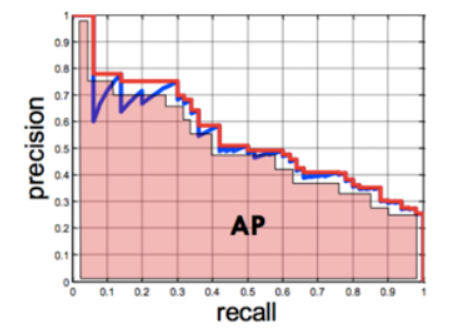   

In [40]:
##### DecisionTree의 PrecisionRecall 커브 그리기 + AP Score 계산.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# 모델이 추정한 positive 확률을 조회
test_proba_tree = tree.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc.predict_proba(X_test)[:, 1] 

In [ ]:
### ap score 로 모델을 평가
tree_ap = average_precision_score(y_test, test_proba_tree)  # (y정답, 모델이 예측한 양성일 확률)
# (label주면 안된다!!=> 0 아니면 1로 예측한 결과 (predict()) 를 넣으면 안 된다는 말)
rfc_ap = average_precision_score(y_test, test_proba_rfc)

print("DecisionTree Average Precision Score:", tree_ap)
print("RandomForest Average Precision Score:", rfc_ap)
# RandomForest 모델이 DecisionTree 보다 AP score가 높다. 즉 성능이 우수하다.

DecisionTree Average Precision Score: 0.6766948888666132
RandomForest Average Precision Score: 0.8775487970449385


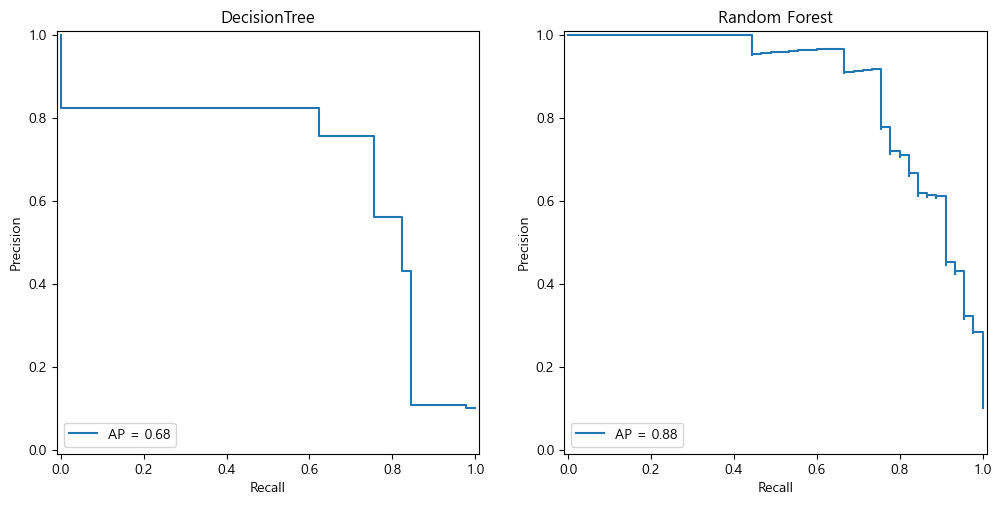

In [42]:
### 시각화
precisions1, recalls1, _ = precision_recall_curve(y_test, test_proba_tree) #_의 의미, 필요없단 의미
precisions2, recalls2, _ = precision_recall_curve(y_test, test_proba_rfc) # precision_recall_curve 이 함수는 3개의 값을 반환한다.
# precision, recall, threshold 세개를 반환하는데, curve 그래프를 그리는데, threshold가 필요없으니, 무시하겠다는 의미미

### 하나의 Figure 두개 subplot으로 그리기.
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1) # DecisionTree
ax2 = fig.add_subplot(1, 2, 2) # RandomForest

# decision tree
disp_tree = PrecisionRecallDisplay(  #PrecisionRecall Curve를 시각화하는 class
    precisions1, # precision값들
    recalls1,    # recall값들
    average_precision=tree_ap  # AP score
)
disp_tree.plot(ax=ax1) # 시각화

# random forest
disp_rfc = PrecisionRecallDisplay(precisions2, recalls2, average_precision=rfc_ap)
disp_rfc.plot(ax=ax2)

# naming
ax1.set_title("DecisionTree")
ax2.set_title("Random Forest")
plt.show()

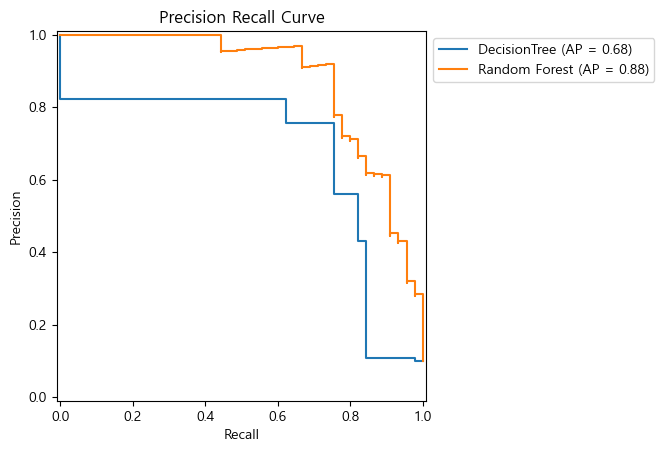

In [43]:
### 하나의 subplot에 같이 그리기.

precisions1, recalls1, _ = precision_recall_curve(y_test, test_proba_tree) # threshold는 안쓴다.
precisions2, recalls2, _ = precision_recall_curve(y_test, test_proba_rfc)

ax = plt.gca()

# decision tree
disp_tree = PrecisionRecallDisplay(
    precisions1, 
    recalls1, 
    average_precision=tree_ap, 
    estimator_name="DecisionTree" # label 지정. 범례에 들어갈 타이틀
)

disp_tree.plot(ax=ax) #같은 ax를 넣는다.

# randon forest
disp_rfc = PrecisionRecallDisplay(
    precisions2, 
    recalls2, 
    average_precision=rfc_ap, 
    estimator_name="Random Forest"
)
disp_rfc.plot(ax=ax) #같은 ax를 넣는다.

# naming
plt.title("Precision Recall Curve")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율(양성(pos)으로 예측했는데 틀림(False))
    - 낮을 수록 좋다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을 수록 좋다.
    $$
    \frac{TP}{FN+TP}
    $$
- Positive의 임계값을 변경할 경우 **FPR과 TPR(recall)은 비례해서 변화한다.**
- <b style='font-size:1.3em'>ROC Curve</b>
    - 이진 분류의 성능 평가 지표
    - Positive 확률을 이용해 class(0or1)을 결정할 때 임계값이 변화에 따른 재현율(TPR, recall)과 위양성율(FPR, fall-out)의 변화를 이용해 모델의 성능을 평가한다.
        - FPR 변화할 때 TPR이 어떻게 변하는 지를 평가한다.
    - FPR을 X축, TPR(recall)을 Y축으로 놓고(PR curve에선 x축) 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
        - 임계값이 감소하니, recall 증가 > FPR 증가 >>>> 증가함수!
    - Positive(양성), Negative(음성) 에 대한 모델의 성능의 강건함(robust)을 평가한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
    - y축이 TPR, x축이 FPR
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

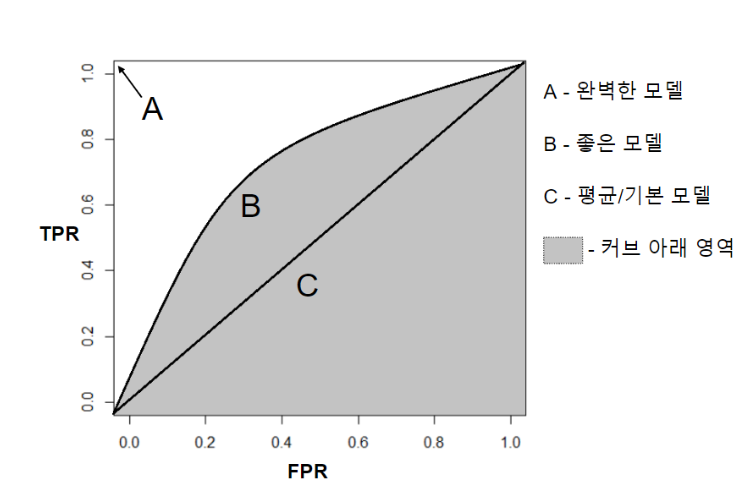

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

### ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
    - 개를 잘 맞춘다거나, 고양이를 잘 맞추는게 한쪽만 중요한게 아니다.
    - 음성에 대한 값을 다룬다.
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)
    - 얘는 음성에 대한 값은 반영되지 않는다.

In [44]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

#### roc-auc score 계산
tree_roc = roc_auc_score(y_test, test_proba_tree) # (첫번째 파라미터, 두번째 파라미터) = (정답, 모델의 예측이 양성일 확률)
rfc_roc =roc_auc_score(y_test, test_proba_rfc)

print("Tree:", tree_roc)
print("RFC:", rfc_roc)

Tree: 0.8975308641975308
RFC: 0.9742661179698217


In [45]:
import pandas as pd
# threshold 변화에 따른 recall, fpr 값의 변화를 조회 >>> roc_curve 사용!
fpr1, recall1, thresh1 = roc_curve(y_test, test_proba_tree)
fpr2, recall2, thresh2 = roc_curve(y_test, test_proba_rfc)

print(fpr1.shape, recall1.shape, thresh1.shape) # 얘는 추가할 거 없다.

pd.DataFrame({
    "Thresh": thresh1,
    "FPR":fpr1,
    "Recall":recall1
})
#inf = 무한대 
# FPR이 증가한다는건 음성에 대한 기능이 떨어지고 있다는 것
# recall 증가는 양성에 대한 기능이 증가하고 있다는 것.


(8,) (8,) (8,)


,Thresh,FPR,Recall
0,inf,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


### threshold 추가할게 없다?

- ROC Curve는 threshold를 직접 기준으로 한 곡선이기 때문에, threshold별 결과들이 1:1 대응
-  PR Curve는 threshold를 직접 하나하나 매칭하는 구조가 아니라, 모델이 positive로 예측하는 경계가 변할 때 생기는 결과를 기록하는 거라서 그렇다

항목 | ROC Curve | PR Curve
|-|-|-|
threshold, fpr, tpr | 항상 길이 같음 | threshold가 1개 적음
구조 | threshold마다 정확히 대응 | threshold 기준은 있지만 precision/recall 더 많음
이유 | threshold 기준으로 직접 점 찍음 | positive 예측 수 변동에 따라 점 찍음

<Axes: xlabel='Thresh'>

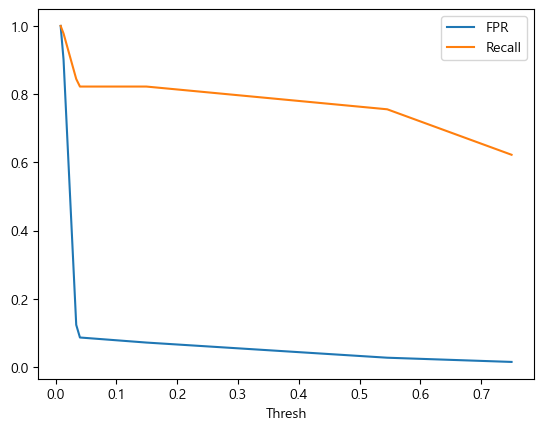

In [46]:
df = pd.DataFrame({
    "Thresh": thresh1,
    "FPR":fpr1,
    "Recall":recall1
})

df.set_index("Thresh").plot()

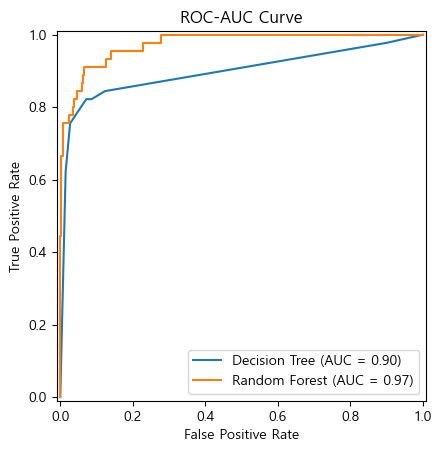

In [47]:
# 시각화

ax = plt.gca()
ax.set_title("ROC-AUC Curve")

# decision tree
disp_roc_tree = RocCurveDisplay(
    fpr=fpr1, tpr=recall1,
    roc_auc=tree_roc, #roc-auc score
    estimator_name="Decision Tree" # legend에 나올 title
) 
disp_roc_tree.plot(ax=ax)

# random forest
disp_roc_rfc = RocCurveDisplay(
    fpr=fpr2, tpr=recall2,
    roc_auc=rfc_roc,
    estimator_name="Random Forest"
)
disp_roc_rfc.plot(ax=ax)

# showing
plt.show()

# 완만하게 증가하는 그래프와, 급격히 증가하는 그래프 중 뭐가더 좋을까?
# TPR은 높을수록 좋고, FPR은 낮을수록 좋다. (TPR: True positive Rate, FPR: False positive rate)
# 따라서 급격히 먼저 올라갈수록, FPR이 낮으면서 TPR이 높다.

In [ ]:
# %load metrics.py

In [ ]:
%%writefile metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve)

__version__ = 1.1

def plot_precision_recall_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """Precision Recall Curve 시각화 함수
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    # ap score 계산
    ap_score = average_precision_score(y_proba, pred_proba)
    # thresh 변화에 따른 precision, recall 값들 계산.
    precision, recall, _ = precision_recall_curve(y_proba, pred_proba)
    # 시각화
    disp = PrecisionRecallDisplay(
        precision, recall, 
        average_precision=ap_score,  
        estimator_name=estimator_name
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()
    
def plot_roc_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """ROC Curve 시각화
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:
    """
    ## ROC-AUC score 계산
    auc_score = roc_auc_score(y_proba, pred_proba)
    ## Thresh 변화에 따른 TPR(Recall) 과 FPR(위양성율) 계산
    fpr, tpr, _ = roc_curve(y_proba, pred_proba)
    ### 시각화
    disp = RocCurveDisplay(
        fpr=fpr, tpr=tpr, 
        estimator_name=estimator_name,
        roc_auc=auc_score
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises:
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, proba=None, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    만약 모델이 추정한 양성의 확률을 전달 받은 경우 average_precision과  roc-auc score도 출력
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        proba: ndarray - 모델이 추정한 양성일 확률값. Default: None
        title: str - 결과에 대한 제목 default=None
    Returns:
    Raises:
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))
    if proba is not None: # proba 값까지 넣어준다면, 아래의 내용도 추가로 출력되도록한다.
        print("Average Precision:", average_precision_score(y, proba))
        print("ROC-AUC Score:", roc_auc_score(y, proba))


## TODO: breast_cancer data 모델링

1. breast cancer data 로딩 
2. train/test set으로 분리
3. 모델링 RandomForestClassifier(max_depth=2, n_estimators=200)
4. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [48]:
# 1. breast cancer data 로딩 

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((569, 30), (569,))

In [49]:
# 2. train/test set으로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    stratify=y,
    random_state=0 
)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [50]:
# 3. 모델링 RandomForestClassifier(max_depth=2, n_estimators=200)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=0) 

# 학습
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [51]:
## 추론
pred_train = rfc.predict(X_train) # class를 예측(0인지 1인지)
pred_test =  rfc.predict(X_test)

pred_proba_train = rfc.predict_proba(X_train)[:, 1] # class별 확률 중 1일 확률만 가져오기
pred_proba_test = rfc.predict_proba(X_test)[:, 1]

In [52]:
# 4. 평가 (Train/Test set)

from sklearn.metrics import ( 
        accuracy_score,
        recall_score, 
        precision_score,
        f1_score,
        classification_report,
        confusion_matrix,
        ConfusionMatrixDisplay,
        precision_recall_curve,
        PrecisionRecallDisplay,
        average_precision_score,
        roc_curve,
        RocCurveDisplay,
        roc_auc_score     
)



In [53]:
# 4
# accuracy
print(f"1. accuracy - Trainset : {accuracy_score(y_train, pred_train)}, Testset: {accuracy_score(y_test, pred_test)}")

# recall
print(f"2. recall - Trainset : {recall_score(y_train, pred_train)}, Testset: {recall_score(y_test, pred_test)}")

# precision
print(f"3. precision - Trainset : {precision_score(y_train, pred_train)}, Testset: {precision_score(y_test, pred_test)}")

# fi score
print(f"4. fi score - Trainset : {f1_score(y_train, pred_train)}, Testset: {f1_score(y_test, pred_test)}")
print()

# Classification Report
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train))
print()
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test))
print()



1. accuracy - Trainset : 0.9692307692307692, Testset: 0.9385964912280702
2. recall - Trainset : 0.9859649122807017, Testset: 0.9444444444444444
3. precision - Trainset : 0.9656357388316151, Testset: 0.9577464788732394
4. fi score - Trainset : 0.9756944444444444, Testset: 0.951048951048951

---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       170
           1       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455


---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0

train set
[[160  10]
 [  4 281]]
--------------------
test set
[[39  3]
 [ 4 68]]


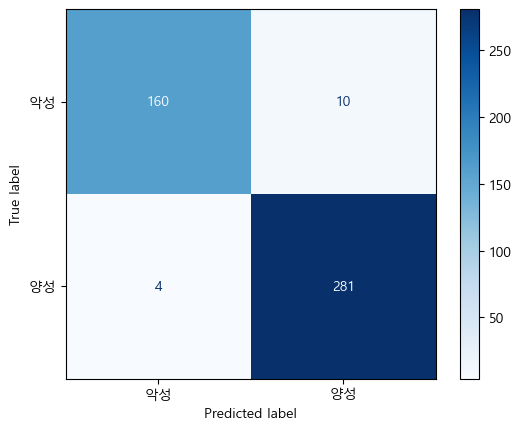

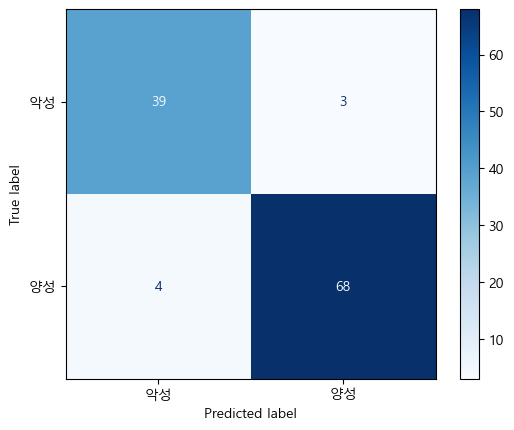

In [54]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, pred_train)
cm_test =  confusion_matrix(y_test, pred_test)

print(f"train set\n{cm_train}")
print("-"* 20)
print(f"test set\n{cm_test}")

cm_disp_train = ConfusionMatrixDisplay(cm_train, display_labels=["악성", "양성"])
cm_disp_train.plot(cmap="Blues");

cm_disp_test = ConfusionMatrixDisplay(cm_test, display_labels=["악성", "양성"])
cm_disp_test.plot(cmap="Blues");




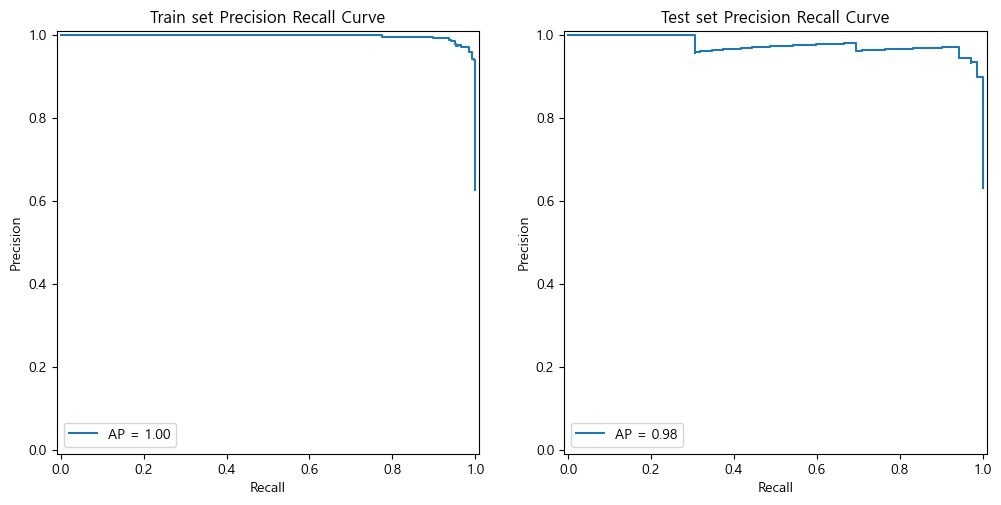

In [55]:
# PR(Precision Recall) curve 그래프 그리기

import matplotlib.pyplot as plt

### 하나의 Figure 두개 subplot으로 그리기.
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1) # Train set Precision Recall Curve 자리(좌측)
ax2 = fig.add_subplot(1, 2, 2) # Test set Precision Recall Curve 자리(우측)

# Train set Precision Recall Curve Part
ap_score = average_precision_score(y_train, pred_proba_train)
p,r,t = precision_recall_curve(y_train, pred_proba_train)
pr_disp = PrecisionRecallDisplay(p,r, average_precision=ap_score)
pr_disp.plot(ax=ax1) # 시각화

# Test set Precision Recall Curve Part
ap_scoret = average_precision_score(y_test, pred_proba_test)
pt,rt,tt = precision_recall_curve(y_test, pred_proba_test)
pr_dispt = PrecisionRecallDisplay(pt,rt, average_precision=ap_scoret)
pr_dispt.plot(ax=ax2) # 시각화

# Title 기입 후 show
ax1.set_title("Train set Precision Recall Curve")
ax2.set_title("Test set Precision Recall Curve")
plt.show()

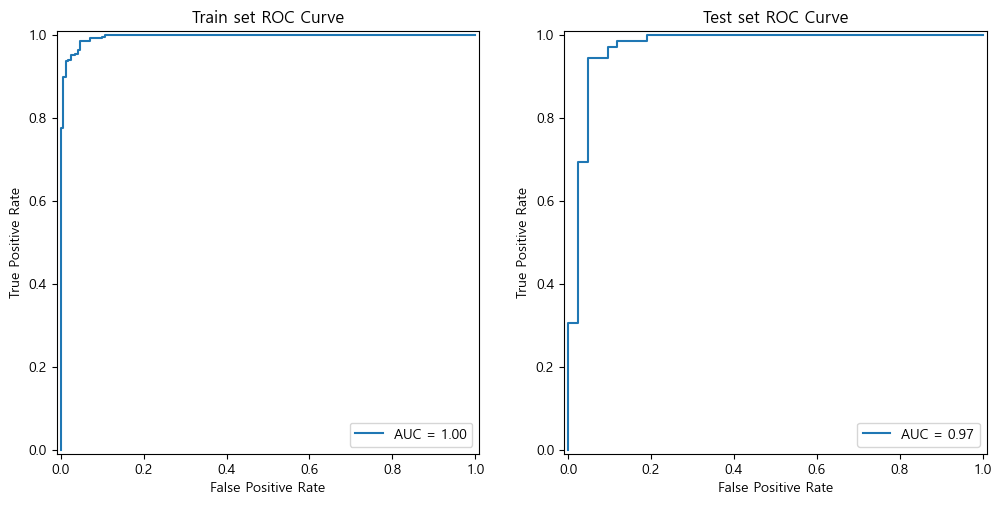

In [56]:
# ROC(Receiver Operating Characteristic) Curve 그래프 그리기

### 하나의 Figure 두개 subplot으로 그리기.
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1) # Train set ROC Curve 자리(좌측)
ax2 = fig.add_subplot(1, 2, 2) # Test set ROC Curve 자리(우측)

# Train set ROC Curve Part
fpr_tr, tpr_tr, t_tr = roc_curve(y_train, pred_proba_train)
auc_score_train = roc_auc_score(y_train, pred_proba_train)
roc_disp_train = RocCurveDisplay(fpr=fpr_tr, tpr=tpr_tr, roc_auc=auc_score_train)
roc_disp_train.plot(ax=ax1) # 시각화

# Test set ROC Curve Part
fpr_te, tpr_te, t_te = roc_curve(y_test, pred_proba_test)
auc_score_test = roc_auc_score(y_test, pred_proba_test)
roc_disp_test = RocCurveDisplay(fpr=fpr_te, tpr=tpr_te, roc_auc=auc_score_test)
roc_disp_test.plot(ax=ax2) # 시각화

# Title 기입 후 show
ax1.set_title("Train set ROC Curve")
ax2.set_title("Test set ROC Curve")
plt.show()


# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() >>> 마찬가지로 정답과 예측값 순으로 넣어주면된다.
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
      
\begin{align}
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
y_i: 실제값, \hat{y_i}: 모델이 예측한 값
\end{align}    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다. MSE의 제곱근을 계산한 평가지표가 RMSE이다.
    - `root_mean_squared_error()` 함수 1.4 버전에서 추가됨.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
        - '평균으로 예측했을 때, 정답과 평균 사이의 오차'와 '모델로 예측했을 때, 정답과 모델의 예측값 사이의 오차'를 비교하여, 모델을 사용했을 때의 오차가 평균에 비해 얼마나 줄어들었는지 보는 것
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$: i번째 정답 값,   
- $\hat{y_i}$: i 번째 예측 값,   
- $\bar{y}$: y의 평균      


## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수 : 내 조건에 맞는 데이터셋을 만드는데 도움을 주는 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

In [ ]:
## scikit-learn 제공 데이터셋 종류
# load_xxxxx : 실제 데이터셋. scikit-learn 설치시 같이 데이터파일 저장. 데이터양이 적은 애들.
# fetch_xxxx : 실제 데이터셋. 처음 함수가 호출될 때 데이터파일을 다운로드. 데이터양이 큰 애들.
# make_xxxxx : 가짜 데이터셋을 생성하는 함수. 우리가 원하는 값들을 가지는 데이터를 생성할 때 사용.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression  # make_regression: 회귀문제용 데이터셋을 생성하는 함수

In [58]:
X, y = make_regression(  # 회귀형, 정답이 수치형인 데이터셋 만들기
     n_samples=1000,     # 총데이터개수(Data point)
     n_features=1,       # feature의 개수(컬럼수)
     n_informative=1,    # y(Label)에 영향을 주는 feature의 개수. n_features보다 크면 안됨.
                         # n_features = 3인데, n_informative = 1 인 경우, y에 영향을 주는 컬럼은 하나, 나머지 두개는 영향을 안주는 컬럼이란 소리
                         # 필요없는 컬럼을 제거하는 연습을 할 때 쓴다.
     noise=30,           # 모델이 찾을 수 없는 값의 범위. 0 ~ noise 사이 랜덤한 실수 값이 noise로 설정됨.==> 인정할 수 있는 오차 범위.
                         # 다른 특성들에 의해 데이터가 잘못되거나 일관되지 않아서 모델이 제대로 예측하지 못하는 경우 생기는 노이즈를 감안하기 위한 설정
                         # 원래는 X값과 Y값이 일대일 대응이어야하는데, 회귀형 데이터셋은 X값 하나로 Y값 하나를 바로 예측하지 못한다.
                         # Y값 하나를 구하려면 그에 해당하는 X값 하나 뿐 아니라 Y값에 영향을 주는 추가적인 Feature가 있다는 소리인데,
                         # 그러한 추가적인 Feature를 알지 못하니, 그걸 감안하기 위한 노이즈 범위를 설정하는 것.
     random_state=0
)
X.shape, y.shape # n_features를 1로 두어서 X.shape의 컬럼이 1이라고 나온다.

((1000, 1), (1000,))

In [59]:
X[:5]

array([[-2.55298982],
       [ 1.76405235],
       [-1.79132755],
       [-1.2140774 ],
       [-1.4449402 ]])

In [60]:
y[:5] # 상기 X의 값들을 5개 넣었을때 아래의 y값 5개 나오도록하는 모델을 만들거다!

array([-226.98542474,  165.24959267, -110.53873999,  -83.35797108,
       -125.77525151])

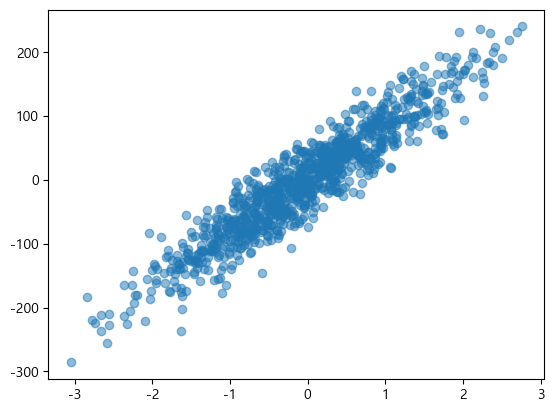

In [61]:
###  X, y 관계를 시각화 (둘다 연속성(수치형) - 산점도, 점수: 상관계수)
plt.scatter(X.flatten(), y, alpha=0.5)
plt.show()

In [62]:
# 상관계수  -1 ~ 1 (음수: 반비례, 양수: 비례). 1에 가까울수록 관계가 크다. 
np.corrcoef([X.flatten(), y])

array([[1.        , 0.93856218],
       [0.93856218, 1.        ]])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # 직선의 방정식을 이용한 모델. 추세선식!
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((800, 1), (200, 1))

In [65]:
# 모델링
lr = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3, random_state=0)

#  학습
lr.fit(X_train, y_train)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [66]:
# 평가
## 추정 -> 회귀모델은 predict()로 추정. predict_proba()는 없다.(분류)
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

In [67]:
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
# 회귀 평가 - 평가함수(정답, 모델추정값)
print("LinearRegression  평가")
print("MSE:", mean_squared_error(y_train, pred_train_lr), mean_squared_error(y_test, pred_test_lr), sep=" , ")
print("RMSE:", root_mean_squared_error(y_train, pred_train_lr), root_mean_squared_error(y_test, pred_test_lr), sep=" , ")
print("R square(결정계수):", r2_score(y_train, pred_train_lr), r2_score(y_test, pred_test_lr), sep=" , ")

LinearRegression  평가
MSE: , 899.6108311038803 , 832.1344100029423
RMSE: , 29.993513150411044 , 28.846740023838784
R square(결정계수): , 0.8826629445928171 , 0.8700578135014047


In [69]:
print("Decision Tree 평가 결과")
print("MSE:", mean_squared_error(y_train, pred_train_tree), mean_squared_error(y_test, pred_test_tree), sep=" , ")
print("RMSE:", root_mean_squared_error(y_train, pred_train_tree), root_mean_squared_error(y_test, pred_test_tree), sep=" , ")
print("R square(결정계수):", r2_score(y_train, pred_train_tree), r2_score(y_test, pred_test_tree), sep=" , ")

Decision Tree 평가 결과
MSE: , 999.7466989529054 , 1057.6377039774145
RMSE: , 31.61877130681876 , 32.521342284374036
R square(결정계수): , 0.8696021326641414 , 0.8348442822143439


In [70]:
# linspace >>> -3.2에서 3.2까지 동일한 간격으로 떨어진 값 1000개 만들기.
# linspace는 1차원이라서, reshape해서 2차원으로 만들어줌 [..., np.newaxis]
np.linspace(-3.2, 3.2, 1000).reshape(-1, 1).shape

(1000, 1)

In [71]:
#############################################################
# LinearRegression, DecisionTree 모델이 추청한 결과를 시각화.
#############################################################
# 모델이란 건 결국 함수! 입력값을 넣으면 결과값이 나오므로 입력값을 넣어 나오는 결과값을 비교한다.
# 즉 1000개의 입력값을 만들었고, 이걸 직선의방정식(lr)과 모델(dt)에 넣어 나오는 결과값을 시각화하여 비교해보고자하는 것.
## 입력값을 생성
new_X = np.linspace(-3.2, 3.2, 1000).reshape(-1, 1)
new_y_lr = lr.predict(new_X)
new_y_tree = tree.predict(new_X)

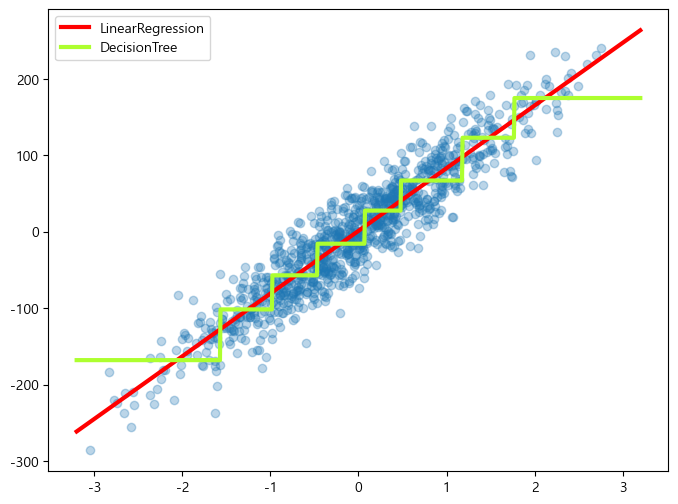

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.3) # 원데이터의 분포>>>산점도 
plt.plot(new_X.flatten(), new_y_lr, label="LinearRegression", color="red", linewidth=3) #>>lr(직선의방정식)
plt.plot(new_X.flatten(), new_y_tree, label="DecisionTree", color="greenyellow", linewidth=3)#>>dt(모델)
plt.legend()
plt.show()

In [2]:
%%writefile metrics.py

###### 평가 모듈 -> 다양한 평가지표들을 계산/출력하는 함수들가지는 모듈
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

__version__ = 1.2

def plot_precision_recall_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """Precision Recall Curve 시각화 함수
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    # ap score 계산
    ap_score = average_precision_score(y_proba, pred_proba)
    # thresh 변화에 따른 precision, recall 값들 계산.
    precision, recall, _ = precision_recall_curve(y_proba, pred_proba)
    # 시각화
    disp = PrecisionRecallDisplay(
        precision, recall, 
        average_precision=ap_score,  
        estimator_name=estimator_name
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()
    
def plot_roc_curve(y_proba, pred_proba, estimator_name=None, title=None):
    """ROC Curve 시각화
    Args:
        y_proba: ndarray - 정답
        pred_proba: 모델이 추정한 양성(Positive-1)일 확률
        estimator_name: str - 모델 이름. 시각화시 범례에 출력할 모델이름
        title: str - plot 제목
    Returns:
    Raises:"""
    ## ROC-AUC score 계산
    auc_score = roc_auc_score(y_proba, pred_proba)
    ## Thresh 변화에 따른 TPR(Recall) 과 FPR(위양성율) 계산
    fpr, tpr, _ = roc_curve(y_proba, pred_proba)
    ### 시각화
    disp = RocCurveDisplay(
        fpr=fpr, tpr=tpr, 
        estimator_name=estimator_name,
        roc_auc=auc_score
    )
    disp.plot()
    if title:
        plt.title(title)
    plt.show()

def plot_confusion_matrix(y, pred, title=None):
    """Confusion matrix 시각화 함수
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        title: str - 출력할 제목. default=None
    Returns:
    Raises::
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    if title:
        plt.title(title)
    plt.show()

def print_binary_classification_metrics(y, pred, proba=None, title=None):
    """정확도, 재현율, 정밀도, f1 점수를 계산해서 출력하는 함수
    만약 모델이 추정한 양성의 확률을 전달 받은 경우 average_precision과  roc-auc score도 출력
    Args:
        y: ndarray - 정답
        pred: ndarray - 모델 추정결과
        proba: ndarray - 모델이 추정한 양성일 확률값. Default: None
        title: str - 결과에 대한 제목 default=None
    Return
    Exception
    """
    if title:
        print(title)
    print("정확도:", accuracy_score(y, pred))
    print("재현율:", recall_score(y, pred))
    print("정밀도:", precision_score(y, pred))
    print("F1 점수:", f1_score(y, pred))
    if proba is not None:
        print("Average Precision:", average_precision_score(y, proba))
        print("ROC-AUC Score:", roc_auc_score(y, proba))

def print_regression_metrcis(y, pred, title=None):
    """회귀 평가지표를 출력하는 함수
    Args:
        y: ndarray - 정답 
        pred: ndarray - 모델 추정값
        title: 결과에 대한 제목. default: None
    Returns:
    Raises:"""
    if title:
        print(title)
    print("MSE:", mean_squared_error(y, pred))
    print("RMSE:", root_mean_squared_error(y, pred))
    print("R Squared:", r2_score(y, pred))

Overwriting metrics.py


In [3]:
# 위에 새롭게 추가된 함수 확인해보자
import metrics
metrics.print_regression_metrcis(y_train, pred_train_lr)

NameError: name 'y_train' is not defined